# Tâche 8
Matériau : MgSiN2 (mp-1017514)

In [25]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

with MPRester("ThjXyeGFsZiOhMODL") as m:
    bandstructure = m.get_bandstructure_by_material_id("mp-1017514")

# 1. Bande interdite
La bande interdite est une bande dans laquelle aucun niveau d'énergie ne peut être occupé par un électron.

Diagramme de structure de bande du MgSiN2 : 


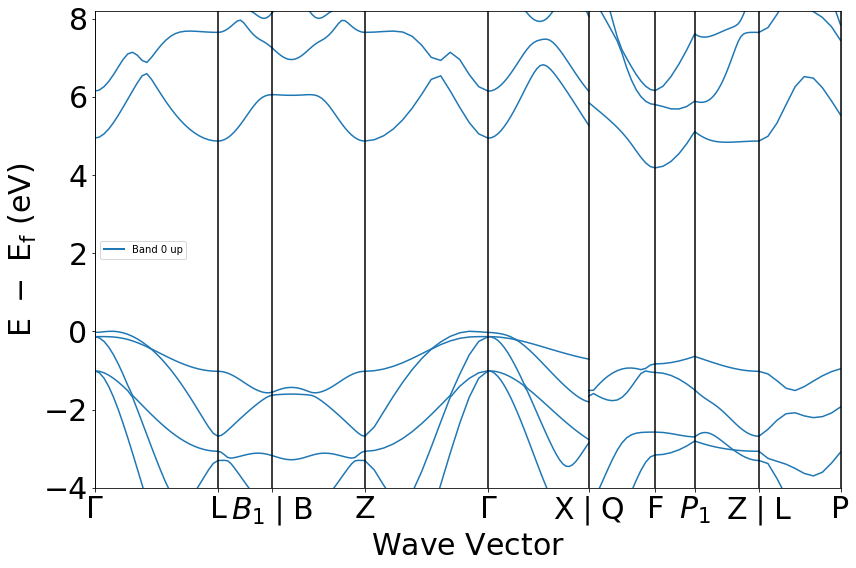

In [123]:
print('Diagramme de structure de bande du MgSiN2 : ')
bsplotter = BSPlotter(bandstructure)
bsplotter.show()

In [27]:
print(bandstructure.get_band_gap())

{'direct': False, 'energy': 4.1796999999999995, 'transition': '(0.077,0.000,0.000)-F'}


Pour le MgSiN2, la bande interdite a une énergie de 4.1796999999999995 eV. (Le matériau est donc un isolant.)

On a un gap indirecte. (Le maximum de la dernière bande de valence et le minimum de la première bande de conduction ne se trouvent pas au même vecteur d'onde.)

# 2. Dispersion

## 2.1. Dernière bande de valence

Pente max :  0.9802719410419183
Pente min :  0.07483806432339334
indice max :  5
indice min :  8


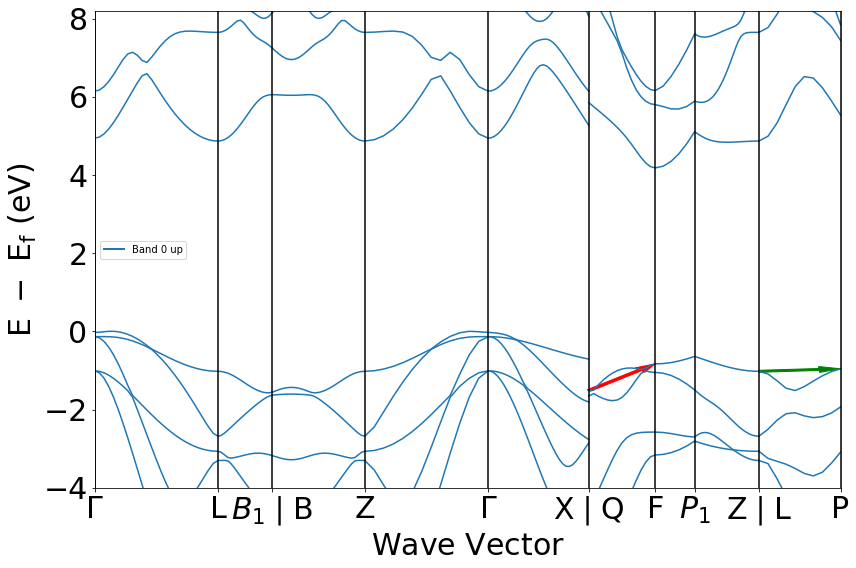

In [133]:
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot()
ener = data.get('energy')['1']
dist = data.get('distances')

#vbm = bandstructure.get_vbm()
#print(vbm.get('band_index'))

index = 10

mini = abs(((ener[0][index][-1]-ener[0][index][0])) / (dist[0][-1]-dist[0][0]))
maxi = abs(((ener[0][index][-1]-ener[0][index][0])) / (dist[0][-1]-dist[0][0]))

for i in range (0,9): 
    slope = abs(((ener[i][index][-1]-ener[i][index][0])) / (dist[i][-1]-dist[i][0]))
    if (slope < mini ):
        mini = slope
        indiceMinV = i 
    if (slope > maxi):
        maxi = slope
        indiceMaxV = i

print('Pente max : ', maxi)
print('Pente min : ', mini)
print('indice max : ', indiceMaxV)
print('indice min : ', indiceMinV)

plt.arrow(dist[indiceMinV][0],ener[indiceMinV][index][0], dist[indiceMinV][-1] - dist[indiceMinV][0], ener[indiceMinV][10][-1] - ener[indiceMinV][10][0],color='g',width=0.05,length_includes_head=True)
plt.arrow(dist[indiceMaxV][0],ener[indiceMaxV][index][0], dist[indiceMaxV][-1] - dist[indiceMaxV][0], ener[indiceMaxV][10][-1] - ener[indiceMaxV][10][0],color='r',width=0.05,length_includes_head=True)


La pente maximale de la dernière bande de valence vaut 0.9802719410419183 et va dans la direction X|Q - F (flèche rouge)

La pente minimale de la dernière bande de valence vaut 0.07483806432339334 et va dans la direction Z|L - P (flèche verte)

## 2.2. Première bande de conduction

Pente max :  2.4070529198160413
Pente min :  0.05678660621306131
indice max :  5
indice min :  8


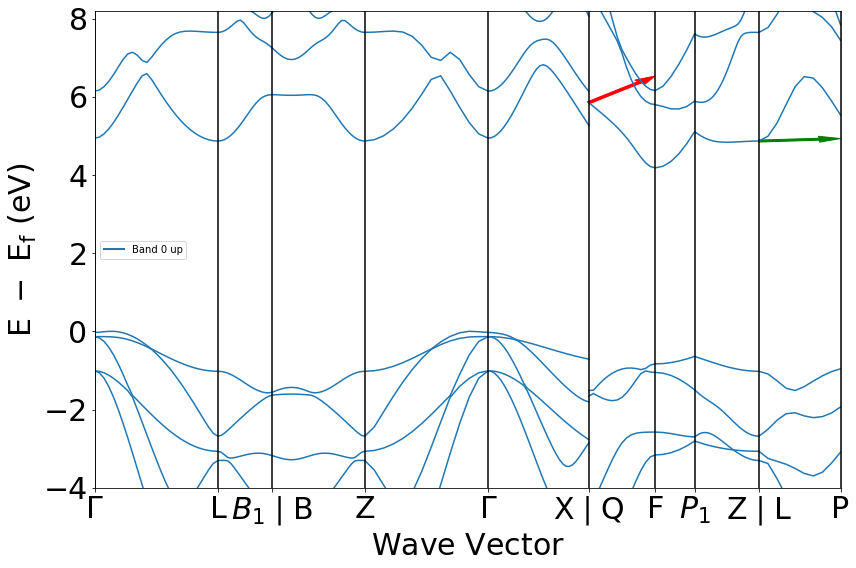

In [157]:
data = bsplotter.bs_plot_data()
pl = bsplotter.get_plot()
ener = data.get('energy')['1']
dist = data.get('distances')

#cbm = bandstructure.get_cbm()
#print(cbm.get('band_index'))

index = 11

mini = abs(((ener[0][index][-1]-ener[0][index][0])) / (dist[0][-1]-dist[0][0]))
maxi = abs(((ener[0][index][-1]-ener[0][index][0])) / (dist[0][-1]-dist[0][0]))

for i in range (0,9): 
    slope = abs(((ener[i][index][-1]-ener[i][index][0])) / (dist[i][-1]-dist[i][0]))
    if (slope < mini ):
        mini = slope
        indiceMin = i 
    if (slope > maxi):
        maxi = slope
        indiceMax = i

print('Pente max : ', maxi)
print('Pente min : ', mini)
print('indice max : ', indiceMax)
print('indice min : ', indiceMin)

plt.arrow(dist[indiceMin][0],ener[indiceMin][index][0], dist[indiceMin][-1] - dist[indiceMin][0], ener[indiceMin][10][-1] - ener[indiceMin][10][0],color='g',width=0.05,length_includes_head=True)
plt.arrow(dist[indiceMax][0],ener[indiceMax][index][0], dist[indiceMax][-1] - dist[indiceMax][0], ener[indiceMax][10][-1] - ener[indiceMax][10][0],color='r',width=0.05,length_includes_head=True)



La pente maximale de la première bande de conduction vaut 2.4070529198160413 et va dans la direction X|Q - F (flèche rouge)

La pente minimale de la première bande de conduction vaut 0.05678660621306131 et va dans la direction Z|L - P (flèche verte)

# 3. Masse effective
La masse effective est définie par le tenseur d'ordre 2 des dérivées secondes de l’énergie E par rapport au
vecteur d’onde **k**:

$$m^* = \frac{\hbar^2}{\frac{\delta^2 E}{\delta k^2}}$$

## 3.1. Dernière bande de valence

In [158]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)

[x1,y1] = [dist[indiceMaxV][0],ener[indiceMaxV][10][0]]     # max de la courbe
[x2,y2] = [dist[indiceMaxV+1][0],ener[indiceMaxV+1][10][0]] # autre point
[x3,y3] = [dist[indiceMaxV-1][0],ener[indiceMaxV-1][10][0]] # autre point

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)         # interpolation

print('y(k) = ', a, 'k^2 + ', b, ' + ', c)                  # équation de la parabole
print('y"(k) = ', 2*a)                                      # dérivée seconde de y(k)

m = abs((hbar**2)/(2*a*(A**2)*eV))                          # masse effective
print('m = ', m)

y(k) =  1.3708840763176509 k^2 +  -14.13751282924713  +  34.93571222927451
y"(k) =  2.7417681526353017
m =  2.5316940471317182e-30


La masse effective de la dernière bande de valence vaut : 2.5316940471317182e-30 kg

## 3.2 Première bande de conduction

In [160]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)

[x1,y1] = [dist[indiceMin][0],ener[indiceMin][10][0]]       # min de la courbe
[x2,y2] = [dist[indiceMin-2][0],ener[indiceMin-2][10][0]]   # autre point
[x3,y3] = [dist[indiceMin-1][0],ener[indiceMin-1][10][0]]   # autre point

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)         # interpolation

print('y(k) = ', a, 'k^2 + ', b, ' + ', c)                  # équation de la parabole
print('y"(k) = ', 2*a)                                      # dérivée seconde

m = abs((hbar**2)/(2*a*(A**2)*eV))                          # masse effective
print('m = ', m)

y(k) =  -0.9516007814228586 k^2 +  12.011178188778766  +  -38.5418038717105
y"(k) =  -1.9032015628457173
m =  3.6471797029544676e-30


La masse effective de la première bande de conduction vaut : 3.6471797029544676e-30 kg